In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from forward_models import ct
from forward_models import denoising

from data_pips import BSDS

from Framework import adversarial_regulariser
from Framework import positiv_adversarial_regulariser
from Framework import postprocessing
from Framework import iterative_scheme
from Framework import total_variation
from Framework import generic_framework
from Framework import total_variation

import util as ut

from networks import multiscale_l1_classifier

def l2(pic):
    return np.sqrt(np.sum(np.square(pic)))

data_gen = generic_framework()
for i in range(32):
    image = data_gen.data_pip.load_data(training_data=False)
    data =  data_gen.model.forward_operator(image[...,0])
    
    # add white Gaussian noise
    noisy_data = data + np.random.normal(size = data_gen.measurement_space) * 0.02
    
    # percentual noise:
    norm = l2(data)
    error = l2(noisy_data-data)
    perc = error/norm
    
    fbp = data_gen.model.inverse(noisy_data)
    norm_fbp = l2(fbp)
    error_fbp = l2(fbp - image)
    perc_fbp = error_fbp/norm_fbp
    
    print('Data: {}, Noise: {}, perc: {}'.format(norm, error, perc))
    print('FBP: {}, Noise: {}, perc: {}'.format(norm_fbp, error_fbp, perc_fbp))

Training Data found: 397
Evaluation Data found: 278


Data: 176.84590087488598, Noise: 1.4871757185906775, perc: 0.008409444104914916
FBP: 62.53606771795777, Noise: 6.960597722487407, perc: 0.11130533109117462
Data: 200.65521579316098, Noise: 1.4831019513975214, perc: 0.007391295289958123
FBP: 70.92950120101649, Noise: 7.1846512166039105, perc: 0.10129284846149386
Data: 221.19361922872008, Noise: 1.487994789729687, perc: 0.006727114439006763
FBP: 77.90364265592784, Noise: 7.597994148173819, perc: 0.09753066595013285
Data: 200.21632831764745, Noise: 1.5017276986633152, perc: 0.007500525612880046
FBP: 70.76774843634634, Noise: 7.2326162354892904, perc: 0.10220215275034265


Data: 232.6860310858819, Noise: 1.4905833464426808, perc: 0.006405985522579663
FBP: 81.6360599800266, Noise: 7.47696250236142, perc: 0.09158896821074858
Data: 203.54844325123196, Noise: 1.486321468062663, perc: 0.00730205274146044
FBP: 71.96555436891319, Noise: 7.293602154303037, perc: 0.10134851622088857
Data: 231.92525567249032, Noise: 1.4634744576693959, perc: 0.006310112512006967
FBP: 81.43558132812709, Noise: 7.469366965887655, perc: 0.0917211720487566
Data: 228.48523783004012, Noise: 1.4699727102588127, perc: 0.006433556601815384
FBP: 80.15939321322548, Noise: 7.340751912533036, perc: 0.0915769396233639


Data: 219.3992507963507, Noise: 1.4888676967267183, perc: 0.006786111125368905
FBP: 77.35019859480808, Noise: 7.66510966979599, perc: 0.09909618603500897
Data: 181.30208303408983, Noise: 1.5035413423213404, perc: 0.008293017472053164
FBP: 64.14374421465432, Noise: 7.09101875593841, perc: 0.11054887491769448
Data: 212.3507012291224, Noise: 1.5039276517856237, perc: 0.007082282484025867
FBP: 75.00347973698453, Noise: 7.531149709199972, perc: 0.10041067075300415
Data: 144.92655737044885, Noise: 1.4861173342438803, perc: 0.01025427886515785
FBP: 51.377594596891164, Noise: 6.6883849512132025, perc: 0.13018096708672916


Data: 225.72175903089183, Noise: 1.484104894858676, perc: 0.0065749305748391065
FBP: 79.20420231315066, Noise: 7.307450597062947, perc: 0.09226089504912109
Data: 154.4077394433323, Noise: 1.4593620577448652, perc: 0.009451353041020665
FBP: 54.705468030370376, Noise: 6.606812469587795, perc: 0.12077060497718338
Data: 220.37324517168594, Noise: 1.4859384434453333, perc: 0.006742825982744343
FBP: 77.65905427532259, Noise: 7.631835875019993, perc: 0.09827361337627223
Data: 204.00143611626856, Noise: 1.4579824661330854, perc: 0.007146922560398658
FBP: 72.09559558214184, Noise: 7.200349682687537, perc: 0.09987225467169969
Data: 215.54823814809993, Noise: 1.4948681624596116, perc: 0.0069351908199430995
FBP: 75.95350590060836, Noise: 7.577209291485398, perc: 0.0997611525845933
Data: 216.80918489826487, Noise: 1.4949518133454514, perc: 0.006895242072179459
FBP: 76.0542505284057, Noise: 7.132462725884574, perc: 0.0937812505721906


Data: 206.1249431473542, Noise: 1.484654851934674, perc: 0.007202693809226799
FBP: 72.70928172136966, Noise: 7.509814897432637, perc: 0.10328550522904506
Data: 222.1859440873792, Noise: 1.4812879082701984, perc: 0.006666883966735769
FBP: 78.18380911552276, Noise: 7.46042005731853, perc: 0.09542154752648556
Data: 241.9660681273306, Noise: 1.4973583006646933, perc: 0.0061882986827588304
FBP: 84.8809253270427, Noise: 7.503761873936445, perc: 0.08840339387235424
Data: 156.66120890316148, Noise: 1.4958467204877135, perc: 0.009548290422119465
FBP: 55.547578230428954, Noise: 6.870083802446424, perc: 0.12367926777918453
Data: 237.31891122495907, Noise: 1.4719886784480953, perc: 0.00620257640172961
FBP: 83.2875495975764, Noise: 7.4183081478438995, perc: 0.08906863251094814
Data: 226.77887081913076, Noise: 1.4805481418871718, perc: 0.0065285982619959085
FBP: 79.87235299800238, Noise: 7.634321174947128, perc: 0.09558152337315094
Data: 243.30868703665308, Noise: 1.4910024361030842, perc: 0.0061280

Data: 219.44304500257007, Noise: 1.4692343055415218, perc: 0.006695287633856495
FBP: 77.40770714211861, Noise: 7.60467547103592, perc: 0.09824183859462374
Data: 212.03279522281454, Noise: 1.4708321604665486, perc: 0.006936814462691611
FBP: 74.8926575590024, Noise: 7.40944065304633, perc: 0.0989341398014749
Data: 143.48810381874867, Noise: 1.4785133674231443, perc: 0.010304083252021876
FBP: 50.836712500816034, Noise: 6.55543530168889, perc: 0.12895081092396882
Data: 136.60516353024508, Noise: 1.491285760647391, perc: 0.010916759821580337
FBP: 48.52420918421159, Noise: 6.638222221551137, perc: 0.136802275259151
Data: 211.9885573268048, Noise: 1.4714492992152781, perc: 0.006941173230151613
FBP: 74.8976645580488, Noise: 7.429245928649783, perc: 0.09919195708554848


In [4]:
from forward_models import denoising
from data_pips import BSDS
from data_pips import ellipses
from Framework import total_variation

class tv(total_variation):
    experiment_name = 'Standard'
    noise_level = 0.01
    def_lambda = 0.0015

    def get_Data_pip(self):
        return ellipses()

tv = tv()
print(tv.noise_level)
lmb = []
for k in range(5):
    lmb.append(3 **(k -10))
tv.find_TV_lambda(lmb)

0.01

Quality of reconstructed image: 2.17373SSIM: 0.964549514749


Lambda: 0.0004572473708276177, MSE: 2.17373347085, OriginalError: 8.22812577573


Quality of reconstructed image: 2.63416SSIM: 0.952508221097


Lambda: 0.0013717421124828531, MSE: 2.63416026367, OriginalError: 8.22812577573


Quality of reconstructed image: 3.56039SSIM: 0.924662641711


Lambda: 0.00411522633744856, MSE: 3.56038617279, OriginalError: 8.22812577573


Quality of reconstructed image: 4.93201SSIM: 0.871121646578


Lambda: 0.012345679012345678, MSE: 4.93200997927, OriginalError: 8.22812577573


Quality of reconstructed image: 6.67398SSIM: 0.800108758462


Lambda: 0.037037037037037035, MSE: 6.67398357352, OriginalError: 8.22812577573


Quality of reconstructed image: 8.82012SSIM: 0.745652194662


Lambda: 0.1111111111111111, MSE: 8.82011898634, OriginalError: 8.22812577573


Quality of reconstructed image: 10.527SSIM: 0.726214542916


Lambda: 0.3333333333333333, MSE: 10.5270383584, OriginalError: 8.22812577573


Quality of reconstructed image: 15.5702SSIM: 0.697165284907


Lambda: 1, MSE: 15.5701898274, OriginalError: 8.22812577573


C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [19]:
a = [1, 2, 3, 4]
b = a[2:4]
print(b)

[3, 4]


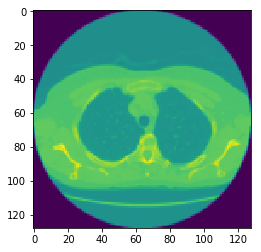

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [4]:
import

C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\odl\contrib\tensorflow\__init__.py
0.6.1.dev0


In [16]:
import tensorflow as tf
from util import lrelu
### resnet architectures
def apply_conv(x, filters=32, kernel_size=3):
    return tf.layers.conv2d(x, filters=filters, kernel_size=kernel_size, padding='SAME',
                            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(),
                            activation=lrelu)

def resblock(x, filters):
    with tf.name_scope('resblock_bn'):
        x = tf.identity(x)
        update = apply_conv(x, filters=filters)
        update = apply_conv(update, filters=filters)

        skip = tf.layers.conv2d(x, filters=filters, kernel_size=1, padding='SAME',
                                kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
        return skip + update
    
def meanpool(x):
    with tf.name_scope('meanpool'):
        x = tf.identity(x)
        return tf.add_n([x[:, ::2, ::2, :], x[:, 1::2, ::2, :],
                         x[:, ::2, 1::2, :], x[:, 1::2, 1::2, :]]) / 4.

In [29]:
import tensorflow as tf
sess = tf.InteractiveSession
pic = tf.placeholder(shape=[None, 128, 128, 1],
                             dtype=tf.float32)
with tf.name_scope('pre_process'):
    x = apply_conv(pic, filters=64, kernel_size=3)

with tf.name_scope('x1'):
    x = resblock(x, 64)

with tf.name_scope('x2'):
    x = resblock(meanpool(x), filters=64)  # 1/2

with tf.name_scope('x3'):
    x = resblock(meanpool(x), filters=128)  # 1/4

with tf.name_scope('x4'):
    x = resblock(meanpool(x), filters=256)  # 1/8


with tf.name_scope('post_process'):
    flat = tf.contrib.layers.flatten(x)
    flat = tf.layers.dense(flat, 1)

In [30]:
x.get_shape().as_list()

[None, 16, 16, 256]